

*   Erick Axel Martinez Rios 
*   November 20th, 2020 
*   Final Project Applied Computing 
*   Code for the selection of the final model 





This is code was for the selection of the final model 

Import CSV file 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Import Libraries and Save CSV file data into a pandas Data Frame 

In [2]:
import io
import numpy as np #Library to manage arrays 
import pandas as pd #Lirary for mange dataframes 
import matplotlib.pyplot as plt # Library to make plots. 
#Import csv into a dataframe 
df = pd.read_csv(io.BytesIO(uploaded['data.csv'])) 
print("Complete Data shape:", df.shape) 
print("Data shape withput NA values",df.dropna().shape)

Complete Data shape: (5144, 145)
Data shape withput NA values (3202, 145)


Count the number of NA values on each variable 

In [3]:
columns_na = df.isnull().sum(axis = 0)
pd.set_option('display.max_rows', None)
columns_na

R_fighter                          0
B_fighter                          0
Referee                           23
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1265
B_avg_BODY_landed               1265
B_avg_CLINCH_att                1265
B_avg_CLINCH_landed             1265
B_avg_DISTANCE_att              1265
B_avg_DISTANCE_landed           1265
B_avg_GROUND_att                1265
B_avg_GROUND_landed             1265
B_avg_HEAD_att                  1265
B_avg_HEAD_landed               1265
B_avg_KD                        1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_PASS                      1265
B_avg_REV                       1265
B

Remove NA values from the database 

In [4]:
df_n = df.dropna(axis = 0, how ='any') 
print(df_n.shape)

(3202, 145)


In [5]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 0 to 5008
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 3.5+ MB


Percentage representation of class in the target variable 

Red     2016
Blue    1135
Draw      51
Name: Winner, dtype: int64
['Red' 'Blue' 'Draw']


Text(0, 0.5, 'Counts')

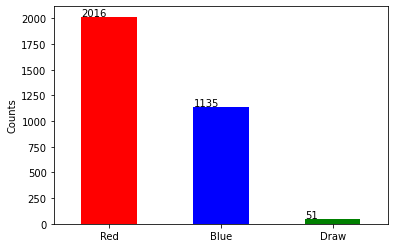

In [6]:
classes = df_n['Winner'].value_counts()
print(classes)
print(classes.index.values)
ax = classes.plot.bar(rot = 0, color=["red", "blue", "green"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Counts")
    

In [7]:
df_n['Winner'].value_counts(normalize=True)

Red     0.629606
Blue    0.354466
Draw    0.015928
Name: Winner, dtype: float64

Process categorical variables 

In [8]:
print('R_fighter numbers:',df_n['R_fighter'].value_counts().shape[0])
print('B_fighter numbers:',df_n['B_fighter'].value_counts().shape[0])
print('Referee numbers:',df_n['Referee'].value_counts().shape[0])
print('date:',df_n['date'].value_counts().shape[0])
print('location:',df_n['location'].value_counts().shape[0])
print('weight_class:',df_n['weight_class'].value_counts().shape[0])
print('R_Stance:',df_n['R_Stance'].value_counts().shape[0])
print('B_Stance:',df_n['B_Stance'].value_counts().shape[0])

R_fighter numbers: 875
B_fighter numbers: 1048
Referee numbers: 166
date: 445
location: 146
weight_class: 13
R_Stance: 4
B_Stance: 4


In [9]:
df_n = df_n.drop(['R_fighter', 'B_fighter', 'Referee', 'date', 'location'], axis=1)
#df_n['R_fighter'] = df_n['R_fighter'].astype('category').cat.codes
#df_n['B_fighter'] = df_n['B_fighter'].astype('category').cat.codes
#df_n['location'] = df_n['location'].astype('category').cat.codes
#f_n['Referee'] = df_n['Referee'].astype('category').cat.codes
#df_n['date'] = df_n['date'].astype('category').cat.codes
df_n['title_bout'] = df_n["title_bout"].astype('category').cat.codes
df_n = pd.get_dummies(df_n, columns=['R_Stance', 'B_Stance', 'weight_class'])
print(df_n.head())
print(df_n.shape)

  Winner  ...  weight_class_Women's Strawweight
0    Red  ...                                 0
1    Red  ...                                 0
2    Red  ...                                 0
3   Blue  ...                                 0
4   Blue  ...                                 0

[5 rows x 158 columns]
(3202, 158)


Extract target variable from the database 

In [10]:
df_filtered = df_n
# Select input variables and separate target variable 
features = df_filtered.loc[:,  df_n.columns != 'Winner']
print(features.shape)

(3202, 157)


In this next section, the machine learning techniques for supervised learning were tested with all the input variables of the database.

Decision Tree Classifier with all the variables of the database as inputs 

In [11]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report #Library for classification report 
from sklearn.metrics import confusion_matrix # Library to generate the confusion matrix of the model. 
# Features and target variable 
X = features.values
y = df_filtered.loc[:,['Winner']].values
print("Shape of input and output variables data", "X:" ,X.shape, "y:" ,y.shape)

# Split data in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) # 80% training and 20% test

# Create Decision Tree classifer object
dt = DecisionTreeClassifier( criterion="gini", max_depth= 25)
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
print(X_train.shape, X_test.shape)
print("Accuracy with traning data set for Decision Tree: {:.4f}".format(dt.score(X_train, y_train)))
print("Accuracy with test data set for Desicion Tree: {:.4f}".format(dt.score(X_test, y_test)))
pred = dt.predict(X_test)
print(confusion_matrix(y_test, pred)) # Print confusion matrix 
print(classification_report(y_test, pred)) # Print classification report 

# Generate Classification Report and save it in CSV file
report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_DT_all.csv") 

Shape of input and output variables data X: (3202, 157) y: (3202, 1)
(2561, 157) (641, 157)
Accuracy with traning data set for Decision Tree: 1.0000
Accuracy with test data set for Desicion Tree: 0.5788
[[ 90   3 130]
 [  6   0   6]
 [123   2 281]]
              precision    recall  f1-score   support

        Blue       0.41      0.40      0.41       223
        Draw       0.00      0.00      0.00        12
         Red       0.67      0.69      0.68       406

    accuracy                           0.58       641
   macro avg       0.36      0.37      0.36       641
weighted avg       0.57      0.58      0.57       641



Clear input and output variables 

In [12]:
del X, X_test, X_train,y, y_test, y_train, dt, pred, report

K NN Classifier using all the variables as predictors 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Input and output variables for the KNN classifier. 
X = features.values
y = df_filtered.loc[:,['Winner']].values
print("Shape of input and output variables ", "X:" ,X.shape, "y:" ,y.shape)
#Split data in train and test set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Establish the number of neightbors for the KNN classiier. 
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train.ravel())
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_KNN_all.csv")

Shape of input and output variables  X: (3202, 157) y: (3202, 1)
Accuracy of K-NN classifier on training set: 0.7107
Accuracy of K-NN classifier on test set: 0.6209
[[ 78   0 152]
 [  2   0   4]
 [ 85   0 320]]
              precision    recall  f1-score   support

        Blue       0.47      0.34      0.39       230
        Draw       0.00      0.00      0.00         6
         Red       0.67      0.79      0.73       405

    accuracy                           0.62       641
   macro avg       0.38      0.38      0.37       641
weighted avg       0.59      0.62      0.60       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reset variables

In [14]:
del X, X_test, X_train,y, y_test, y_train, knn, pred, report

Support Vector Machine with all the variables as inputs 

In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#Import svm model
from sklearn import svm

X = features.values
y = df_filtered.loc[:,['Winner']].values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) # 80% training and 20% test

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#Create a svm Classifier
svc = svm.SVC(kernel='rbf') # Radial Basis Function Kernel 
#Train the model using the training sets
svc.fit(X_train, y_train.ravel())

# Model Accuracy: how often is the classifier correct?
print('Accuracy of SVM classifier on training set: {:.4f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svc.score(X_test, y_test)))

pred = svc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_SVM_all.csv")

Accuracy of SVM classifier on training set: 0.7930
Accuracy of SVM classifier on test set: 0.6771
[[ 60   0 163]
 [  3   0   9]
 [ 32   0 374]]
              precision    recall  f1-score   support

        Blue       0.63      0.27      0.38       223
        Draw       0.00      0.00      0.00        12
         Red       0.68      0.92      0.79       406

    accuracy                           0.68       641
   macro avg       0.44      0.40      0.39       641
weighted avg       0.65      0.68      0.63       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
del X, X_test, X_train,y, y_test, y_train, svc, pred, report

Random Forest Using all the variables as inputs for the model 

In [17]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
X = features.values
y = df_filtered.loc[:,['Winner']].values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1) # 70% training and 30% test

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=120, criterion='gini', max_depth=25)
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train.ravel())

print('Accuracy of Random classifier on training set: {:.4f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random classifier on test set: {:.4f}'
     .format(rfc.score(X_test, y_test)))
#Variables of most importance according to the Gini importance 
feature_imp = pd.Series(rfc.feature_importances_,index=features.columns).sort_values(ascending=False)

pred = rfc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_Random_Forest_all.csv")

Accuracy of Random classifier on training set: 1.0000
Accuracy of Random classifier on test set: 0.6568
[[ 47   0 176]
 [  3   0   9]
 [ 32   0 374]]
              precision    recall  f1-score   support

        Blue       0.57      0.21      0.31       223
        Draw       0.00      0.00      0.00        12
         Red       0.67      0.92      0.78       406

    accuracy                           0.66       641
   macro avg       0.41      0.38      0.36       641
weighted avg       0.62      0.66      0.60       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reset variables 

In [18]:
del X, X_test, X_train,y, y_test, y_train, rfc, pred, report

Principal Component Analysis for Feature Selection 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separating out the features
x = features
# Separating out the target
y = df_filtered.loc[:,['Winner']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
Winner = df_filtered.loc[:,['Winner']]
Winner = Winner.reset_index(drop=True)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

print("Variance percentage of first component:",pca.explained_variance_ratio_[0])
print("Variance percentage of second component:",pca.explained_variance_ratio_[1])
print("Variance percentage of first two components:",sum(pca.explained_variance_ratio_))
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Winner], axis = 1)

Variance percentage of first component: 0.1410759538566523
Variance percentage of second component: 0.088113978422656
Variance percentage of first two components: 0.2291899322793083


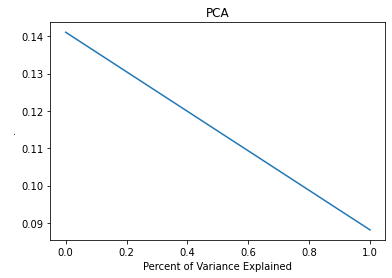

In [20]:
import matplotlib.pyplot as plt 
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA')
plt.xlabel('Percent of Variance Explained')
plt.ylabel('.')
plt.show()

Plot first two principal components 

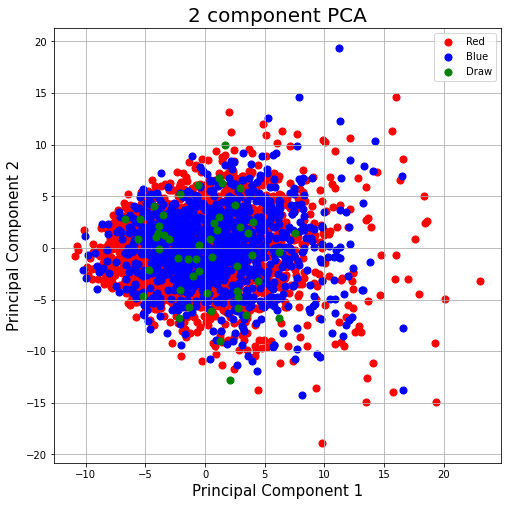

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Red', 'Blue','Draw']
colors = ['r', 'b','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Winner'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Compute the loading scores of each varible in the first and second Principal Components 

In [22]:
df_npca = pd.DataFrame(pca.components_, columns=list(features.columns))
df_npca.head(3)

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,...,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight
0,0.005693,0.009274,0.003511,-0.001226,1.285490e-22,0.124979,0.111691,0.070653,0.065606,0.150439,0.148390,-0.015746,-0.013202,0.141985,0.126025,-0.007442,0.098224,0.097485,-0.013843,-0.003359,0.151367,0.143870,-0.024689,-0.030923,0.016905,0.001002,-0.011867,0.136600,0.100363,-0.004160,0.006263,0.131113,0.116323,0.068330,0.063880,0.150915,0.144248,-0.001948,0.000855,0.146365,...,0.033476,0.004560,0.149811,0.112085,0.034976,0.121914,0.004414,-0.016443,0.044101,0.045666,-0.025299,-0.021727,-0.017518,0.004398,-0.099948,-0.101030,-0.103877,-0.012130,0.001547,-0.007788,0.014518,-0.012559,-0.004045,-0.008335,0.008576,-0.008416,0.000322,0.037080,0.002809,0.034262,0.030735,-0.052035,-0.035407,0.009058,-0.042385,-0.013574,0.025787,0.004513,0.028434,0.067191
1,0.032235,0.032148,-0.024278,0.038073,9.598194e-21,-0.112408,-0.111628,-0.104191,-0.097137,-0.139771,-0.134806,0.002884,0.004063,-0.143074,-0.126381,0.019791,-0.094627,-0.098075,0.021329,-0.003826,-0.149704,-0.144252,0.017350,0.028953,-0.014301,0.002224,0.014179,-0.146937,-0.120447,0.044659,0.016415,-0.133393,-0.131468,-0.106649,-0.100897,-0.141756,-0.145308,-0.022367,-0.020533,-0.147454,...,0.028172,-0.012594,0.135266,0.098261,0.052746,0.139887,0.041511,0.004031,0.043797,0.066276,0.009232,-0.025891,0.004589,0.032973,-0.007937,-0.009212,-0.003189,0.010948,0.003139,-0.003517,0.019225,-0.016797,-0.007322,-0.001460,-0.013512,0.006086,0.019769,0.003763,-0.004121,0.003928,0.008297,-0.007613,0.008979,0.003333,-0.001734,-0.004257,-0.019320,0.001678,0.000599,-0.005518


Sort the values of the loading scores and display them in a bar plot from highest to lowest  

No handles with labels found to put in legend.


R_avg_opp_SIG_STR_att        0.156603
B_avg_opp_SIG_STR_att        0.153639
R_avg_opp_DISTANCE_att       0.152819
R_avg_DISTANCE_att           0.152248
R_avg_SIG_STR_att            0.152172
B_avg_SIG_STR_att            0.151367
B_avg_opp_DISTANCE_att       0.150915
B_avg_DISTANCE_att           0.150439
R_avg_opp_TOTAL_STR_att      0.149811
B_avg_DISTANCE_landed        0.148390
R_avg_opp_HEAD_att           0.148237
R_avg_DISTANCE_landed        0.147880
R_avg_opp_SIG_STR_landed     0.147809
R_avg_opp_DISTANCE_landed    0.147534
B_avg_opp_HEAD_att           0.146365
dtype: float64


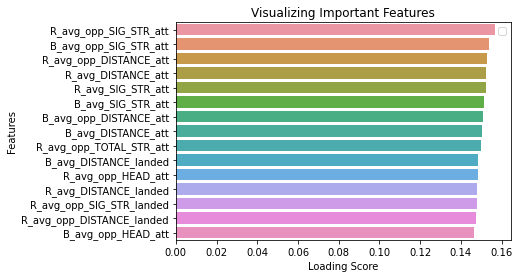

In [23]:
loading_scores = pd.Series(pca.components_[0], index=features.columns)
soarted_loading_scores =  loading_scores.abs().sort_values(ascending = False)
size = 15
ind = soarted_loading_scores[0:size].index.values
print(loading_scores[ind])

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=soarted_loading_scores[0:size], y= soarted_loading_scores[0:size].index)
# Add labels to your graph
plt.xlabel('Loading Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Extract the variables from the original data base with the highest loading scores

In [24]:
features_nf = df_filtered[ind]
print(features_nf.shape)
features_nf.describe()

(3202, 15)


,R_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_att,R_avg_opp_DISTANCE_att,R_avg_DISTANCE_att,R_avg_SIG_STR_att,B_avg_SIG_STR_att,B_avg_opp_DISTANCE_att,B_avg_DISTANCE_att,R_avg_opp_TOTAL_STR_att,B_avg_DISTANCE_landed,R_avg_opp_HEAD_att,R_avg_DISTANCE_landed,R_avg_opp_SIG_STR_landed,R_avg_opp_DISTANCE_landed,B_avg_opp_HEAD_att
count,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000
mean,68.734046,69.269012,54.859259,56.582733,74.613685,73.796615,54.823195,56.245636,88.159373,20.595553,54.029330,20.694576,27.702063,18.669918,54.225767
std,39.020485,42.094060,37.305328,38.376308,39.886768,42.694686,40.065263,40.334060,42.854491,15.874534,32.120024,14.714115,15.422932,13.555539,34.741032
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.171875,39.500000,28.000000,29.000000,46.848901,43.517857,26.723214,26.400000,59.022727,9.027778,31.750000,10.166667,17.200000,8.861607,30.578571
50%,63.966667,63.275000,48.414286,49.236111,67.645833,66.763889,47.000000,48.000000,85.000000,16.510870,49.200000,17.105556,25.637500,16.000000,48.784615
75%,89.312500,88.812500,74.393750,77.000000,97.457265,97.479167,73.627273,76.546875,110.975000,28.500000,70.660714,28.864583,35.728571,25.356061,70.000000
max,454.000000,401.000000,440.000000,244.333333,260.625000,299.000000,361.000000,271.000000,461.000000,130.000000,400.000000,131.000000,151.000000,144.000000,335.000000


Decision Tree with variables of PCA feature selection 

In [25]:
X = features_nf.values
y = df_filtered.loc[:,['Winner']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234) # 80% training and 20% test

print(X_train.shape, X_test.shape)
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="gini", max_depth=6)
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(dt.score(X_test, y_test)))

pred = dt.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_DT_PCA.csv")

(2561, 15) (641, 15)
Accuracy of Decision Tree classifier on training set: 0.6790
Accuracy of Decision Tree classifier on test set: 0.6240
[[ 42   0 179]
 [  3   0   4]
 [ 55   0 358]]
              precision    recall  f1-score   support

        Blue       0.42      0.19      0.26       221
        Draw       0.00      0.00      0.00         7
         Red       0.66      0.87      0.75       413

    accuracy                           0.62       641
   macro avg       0.36      0.35      0.34       641
weighted avg       0.57      0.62      0.57       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Erase variables 

In [26]:
del X, X_test, X_train,y, y_test, y_train, dt, pred, report

KNN Nearest Neightbor trained with important features according to the loading scores of each variables in the first principal component of PCA. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Feature Importance 
X = features_nf.values
y = df_filtered.loc[:,['Winner']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

print(X_test.shape, X_train.shape)

#Standarized data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train.ravel())
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(X_test.shape)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_KNN_PCA.csv")

(641, 15) (2561, 15)
Accuracy of K-NN classifier on training set: 0.6947
Accuracy of K-NN classifier on test set: 0.5897
(641, 15)
[[ 76   0 147]
 [  3   0   9]
 [104   0 302]]
              precision    recall  f1-score   support

        Blue       0.42      0.34      0.37       223
        Draw       0.00      0.00      0.00        12
         Red       0.66      0.74      0.70       406

    accuracy                           0.59       641
   macro avg       0.36      0.36      0.36       641
weighted avg       0.56      0.59      0.57       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reset variables 

In [28]:
del X, X_test, X_train,y, y_test, y_train, knn, pred, report

SVM with feature reduction of PCA 

In [29]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm

X = features_nf.values
y = df_filtered.loc[:,['Winner']].values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 25) # 80% training and 30% test
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

print(X_train.shape, X_test.shape)

#Create a svm Classifier
svc = svm.SVC(kernel='rbf') # Linear Kernel
#Train the model using the training sets
svc.fit(X_train, y_train.ravel())
#Predict the response for test dataset
print('Accuracy of Support Vector classifier on training set: {:.4f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of Support Vector classifier on test set: {:.4f}'
     .format(svc.score(X_test, y_test)))

pred = svc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_SVM_PCA.csv")

(2561, 15) (641, 15)
Accuracy of Support Vector classifier on training set: 0.6474
Accuracy of Support Vector classifier on test set: 0.6271
[[  8   0 213]
 [  0   0  11]
 [ 15   0 394]]
              precision    recall  f1-score   support

        Blue       0.35      0.04      0.07       221
        Draw       0.00      0.00      0.00        11
         Red       0.64      0.96      0.77       409

    accuracy                           0.63       641
   macro avg       0.33      0.33      0.28       641
weighted avg       0.53      0.63      0.51       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reset variables 

In [30]:
del X, X_test, X_train,y, y_test, y_train, svc, pred, report

Random Forest trained with important features according to the loading scores of each variables in the first principal component of PCA. 

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
X = features_nf.values
y = df_filtered.loc[:,['Winner']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=120, criterion='gini', max_depth=6)
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train.ravel())

print(X_train.shape,X_test.shape)

print('Accuracy of Random classifier on training set: {:.4f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random classifier on test set: {:.4f}'
     .format(rfc.score(X_test, y_test)))

pred = rfc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_RF_PCA.csv")

(2561, 15) (641, 15)
Accuracy of Random classifier on training set: 0.6837
Accuracy of Random classifier on test set: 0.6474
[[ 14   0 207]
 [  0   0   7]
 [ 12   0 401]]
              precision    recall  f1-score   support

        Blue       0.54      0.06      0.11       221
        Draw       0.00      0.00      0.00         7
         Red       0.65      0.97      0.78       413

    accuracy                           0.65       641
   macro avg       0.40      0.34      0.30       641
weighted avg       0.61      0.65      0.54       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reset Variables 

In [32]:
del X, X_test, X_train,y, y_test, y_train, rfc, pred, report

Select features according to the Gini importance 

In [33]:
size = 15
features_rf = df_filtered[feature_imp.index[0:size]]

"""import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[0:size], y= feature_imp[0:size].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
print(features_rf.shape)
features_rf.describe()

print(features_rf.columns)"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\n%matplotlib inline\n# Creating a bar plot\nsns.barplot(x=feature_imp[0:size], y= feature_imp[0:size].index)\n# Add labels to your graph\nplt.xlabel(\'Feature Importance Score\')\nplt.ylabel(\'Features\')\nplt.title("Visualizing Important Features")\nplt.legend()\nplt.show()\nprint(features_rf.shape)\nfeatures_rf.describe()\n\nprint(features_rf.columns)'

Decision Tree trained with  important features according to the Gini importance 

In [34]:
inputs = ['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed',
       'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed',
       'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed',
       'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct',
       'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']

print(inputs)
dt_final =df_filtered[inputs]
X = dt_final.values
y = df_filtered.loc[:,['Winner']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234) # 80% training and 20% test

print(X_train.shape, X_test.shape)
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="gini", max_depth=6)
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(dt.score(X_test, y_test)))

pred = dt.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_DT_RFF.csv")

f = dt.predict_proba(X_test) 

prob_DF =  pd.DataFrame(f, columns=dt.classes_)

prob_DF.head(3)

['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed', 'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed', 'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed', 'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct', 'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']
(2561, 15) (641, 15)
Accuracy of Decision Tree classifier on training set: 0.6790
Accuracy of Decision Tree classifier on test set: 0.6349
[[ 62   0 159]
 [  1   0   6]
 [ 67   1 345]]
              precision    recall  f1-score   support

        Blue       0.48      0.28      0.35       221
        Draw       0.00      0.00      0.00         7
         Red       0.68      0.84      0.75       413

    accuracy                           0.63       641
   macro avg       0.38      0.37      0.37       641
weighted avg       0.60      0.63      0.60       641



,Blue,Draw,Red
0,0.215789,0.010526,0.773684
1,0.402597,0.000000,0.597403
2,0.035971,0.000000,0.964029


Reset Variables 

In [35]:
del X, X_test, X_train,y, y_test, y_train, dt, pred, report

KNN classifier trained with  important features according to the Gini importance 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

inputs = ['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed',
       'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed',
       'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed',
       'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct',
       'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']

print(inputs)
dt_final =df_filtered[inputs]
X = dt_final.values
y = df_filtered.loc[:,['Winner']].values
#Split data in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
print(X_test.shape, X_train.shape)

#Scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train.ravel())
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(X_test.shape)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_KNN_RFC.csv")

['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed', 'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed', 'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed', 'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct', 'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']
(641, 15) (2561, 15)
Accuracy of K-NN classifier on training set: 0.7282
Accuracy of K-NN classifier on test set: 0.6490
(641, 15)
[[ 90   0 133]
 [  4   0   8]
 [ 80   0 326]]
              precision    recall  f1-score   support

        Blue       0.52      0.40      0.45       223
        Draw       0.00      0.00      0.00        12
         Red       0.70      0.80      0.75       406

    accuracy                           0.65       641
   macro avg       0.41      0.40      0.40       641
weighted avg       0.62      0.65      0.63       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reset Variables 

In [37]:
del X, X_test, X_train,y, y_test, y_train, knn, pred, report

SVM classifier trained with  important features according to the Gini importance 

In [38]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm
inputs = ['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed',
       'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed',
       'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed',
       'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct',
       'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']

print(inputs)
dt_final =df_filtered[inputs]
X = dt_final.values
y = df_filtered.loc[:,['Winner']].values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 25) # 80% training and 30% test
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

print(X_train.shape, X_test.shape)

#Create a svm Classifier
svc = svm.SVC(kernel='rbf') # Linear Kernel
#Train the model using the training sets
svc.fit(X_train, y_train.ravel())
#Predict the response for test dataset
print('Accuracy of Random classifier on training set: {:.4f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of Random classifier on test set: {:.4f}'
     .format(svc.score(X_test, y_test)))

pred = svc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_SVM_RFC.csv")

['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed', 'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed', 'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed', 'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct', 'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']
(2561, 15) (641, 15)
Accuracy of Random classifier on training set: 0.6974
Accuracy of Random classifier on test set: 0.6349
[[ 32   0 189]
 [  2   0   9]
 [ 34   0 375]]
              precision    recall  f1-score   support

        Blue       0.47      0.14      0.22       221
        Draw       0.00      0.00      0.00        11
         Red       0.65      0.92      0.76       409

    accuracy                           0.63       641
   macro avg       0.38      0.35      0.33       641
weighted avg       0.58      0.63      0.56       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reset variables 

In [39]:
del X, X_test, X_train,y, y_test, y_train, svc, pred, report

Random Forest with most important features according to the Gini importance 

In [40]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
inputs = ['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed',
       'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed',
       'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed',
       'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct',
       'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']

print(inputs)
dt_final =df_filtered[inputs]
X = dt_final.values
y = df_filtered.loc[:,['Winner']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

rfc=RandomForestClassifier(n_estimators=120, criterion='gini', max_depth=6)
rfc.fit(X_train,y_train.ravel())
print(X_train.shape,X_test.shape)
print('Accuracy of Random classifier on training set: {:.4f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random classifier on test set: {:.4f}'
     .format(rfc.score(X_test, y_test)))

pred = rfc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_RF_RFC.csv")

['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed', 'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed', 'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed', 'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct', 'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']
(2561, 15) (641, 15)
Accuracy of Random classifier on training set: 0.7200
Accuracy of Random classifier on test set: 0.6677
[[ 35   0 186]
 [  0   0   7]
 [ 20   0 393]]
              precision    recall  f1-score   support

        Blue       0.64      0.16      0.25       221
        Draw       0.00      0.00      0.00         7
         Red       0.67      0.95      0.79       413

    accuracy                           0.67       641
   macro avg       0.44      0.37      0.35       641
weighted avg       0.65      0.67      0.59       641



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
del X, X_test, X_train,y, y_test, y_train, rfc, pred, report

Final Model Training with variables based on the Gini Index Criteria 

In [42]:
#This are the final predictors that will be tested for the model 
inputs = ['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed',
       'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed',
       'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed',
       'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct',
       'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']

print(inputs)

dt_final =df_filtered[inputs]

X = dt_final.values
y = df_filtered.loc[:,['Winner']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234) # 80% training and 20% test

print(X_train.shape, X_test.shape)
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="gini", max_depth=6)
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(dt.score(X_test, y_test)))

pred = dt.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_DT_RFF.csv")

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features_rf.columns,class_names=['Blue','Draw', 'Red'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

f = dt.predict_proba(X_test) 

prob_DF =  pd.DataFrame(f, columns=dt.classes_)

prob_DF.head(10)

['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed', 'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed', 'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed', 'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct', 'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']
(2561, 15) (641, 15)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Accuracy of Decision Tree classifier on training set: 0.6790
Accuracy of Decision Tree classifier on test set: 0.6349
[[ 61   1 159]
 [  1   0   6]
 [ 67   0 346]]
              precision    recall  f1-score   support

        Blue       0.47      0.28      0.35       221
        Draw       0.00      0.00      0.00         7
         Red       0.68      0.84      0.75       413

    accuracy                           0.63       641
   macro avg       0.38      0.37      0.37       641
weighted avg       0.60      0.63      0.60       641



,Blue,Draw,Red
0,0.215789,0.010526,0.773684
1,0.402597,0.000000,0.597403
2,0.035971,0.000000,0.964029
3,0.206897,0.000000,0.793103
4,0.268817,0.032258,0.698925
5,0.402597,0.000000,0.597403
6,0.495536,0.026786,0.477679
7,0.495536,0.026786,0.477679
8,0.402597,0.000000,0.597403
9,0.485000,0.016667,0.498333
